# Movies Analysis

**Imports**
- Pandas
- Matplotlib
- Movie Requests
- Seaborn
- Set Seaborn Theme

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import movie_requests as mrs
import seaborn as sns
sns.set_theme()

**Data**
- Request OMBd 'oscar_winners.csv'.
- Request OMBd 'python_winners.csv'.
- Combined the two csv files to a new 'movies.csv'.
- Import the new csv as a dataframe.

In [ ]:
project_movies = mrs.res_omdb_data('oscar_winners.csv')
python_movies = mrs.res_omdb_data('python_winners.csv')
mrs.save_to_csv('movies.csv', project_movies + python_movies)
movies = pd.read_csv('data/movies.csv')

<class 'pandas.core.frame.DataFrame'>


## Question 9.1
(Graph) What was the runtine for each movie?

**Strategy:**
- Make a really pretty Horizontal Bar plot.
- The more approachable the plot the more likely the data will be absorbed.
- Add labels if possible to more precisely answer the question.

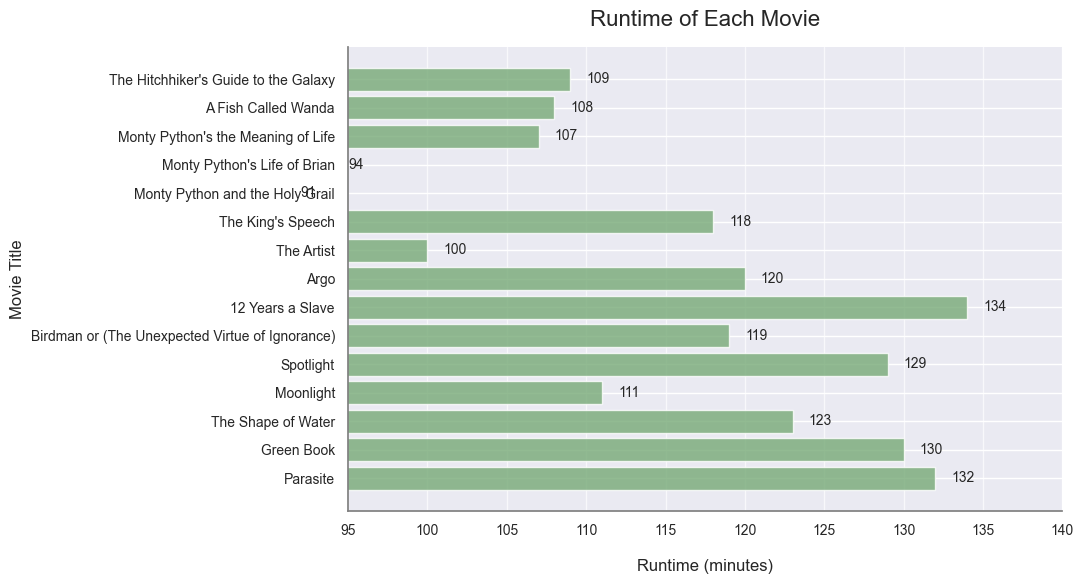

In [70]:
# Size
plt.figure(figsize=(11, 6))

# Horizontal bar plot
plt.barh(
    movies['Movie Title'],  # y-axis
    movies['Runtime'],      # x-axis
    color='#77AA77',        # color
    alpha=0.8,              # Transparency
    edgecolor='#ffffff',    # White edges
    height=0.8              # gap between bars
)

# Annotations
for i, runtime in enumerate(movies['Runtime']):
    plt.text(
        runtime + 1,           # x-position
        i,                     # y-position
        str(runtime),          # text
        va='center',           # vertical alignment
        fontsize=10,           # font size
    )

# Customize Polot
plt.xlabel('Runtime (minutes)', fontsize=12, labelpad=15)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Runtime of Each Movie', fontsize=16, pad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(95, 140)  # Adjust x-axis
plt.grid(axis='x', linestyle='-', color='#ffffff', alpha=0.7)

# Axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

plt.tight_layout()
plt.show()

## Question 9.2
What movie had the longest runtime?

**Answer:**

Based on the horizontal bar plot above, the movie with the longest runtime is 12 Years a Slave, with a runtime of 134 minutes.

## Question 9.3
Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

**Strategy:**
- Calculate correlation coefficient

In [71]:
runtime_award_corr = movies['Runtime'].corr(movies['Award Wins'])
print(f"Correlation Coefficient: {runtime_award_corr:.2f}")

Correlation Coefficient: 0.60


**Answer:**

Runtime and Award Wins have a very weak positive linear correlation. This suggests that as one increases the other does slightly, but it is not strong enough to be a meaningful conclusion.

## Question 9.4
(Graph) How many awards and nominations did each movie receive?

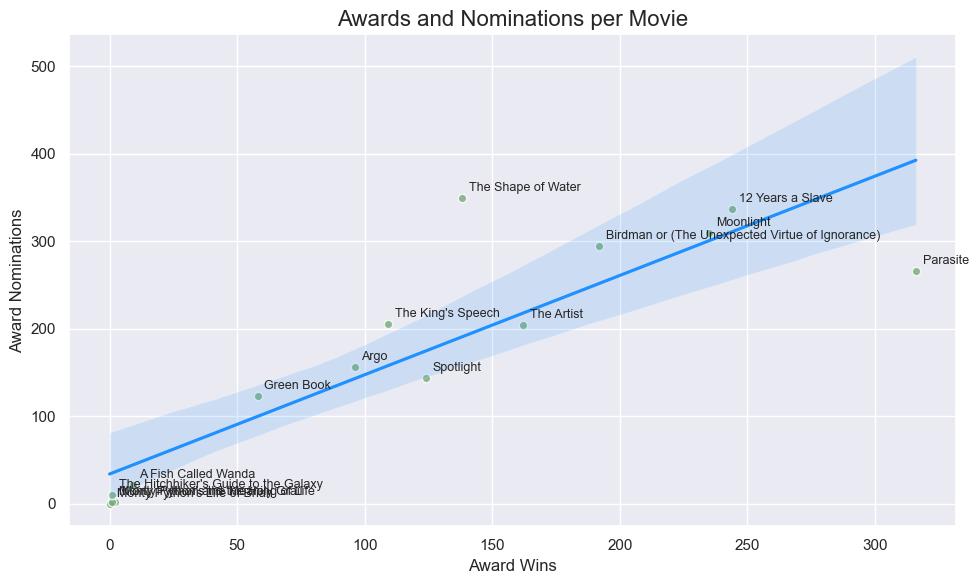

Correlation Coefficient: 0.88


In [72]:
colors = ['#77AA77', '#88BB88', '#99CC99', '#AADDAA', '#BBEEBB', '#CCFFCC', '#D9FFD9', '#E6FFE6', '#F2FFF2', '#FCFFFC']
plt.figure(figsize=(10, 6))

awards_nominations_correlation = movies['Award Wins'].corr(movies['Award Nominations'])

# Plot
# sns.scatterplot(data=movies, 
#                 x=movies['Award Wins'], 
#                 y=movies['Award Nominations'], 
#                 hue='Movie Title', 
#                 s=100, 
#                 palette=colors, 
#                 edgecolor='#ffffff',
#                 color='#77AA77')

sns.regplot(x=movies['Award Wins'], 
            y=movies['Award Nominations'], 
            data=movies, 
            color='#77AA77', 
            line_kws={'color': '#1E90FF'}, 
            scatter_kws={'edgecolor': '#ffffff'})

# Annotations
for i, txt in enumerate(movies['Movie Title']):
    plt.annotate(txt, (movies['Award Wins'][i], movies['Award Nominations'][i]), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.title('Awards and Nominations per Movie', fontsize=16)
plt.xlabel('Award Wins', fontsize=12)
plt.ylabel('Award Nominations', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Correlation Coefficient: {awards_nominations_correlation:.2f}")